In [1]:
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme

set_nb_theme('chesterish')

In [5]:
#load libraries 
import time,os, pickle
from matplotlib.offsetbox import AnchoredText
import sys,pandas as pd, matplotlib , matplotlib.pyplot as plt, matplotlib.lines , numpy as np, math, pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#import cudf
#import ROOT
#from ROOT import TFile

#import root_pandas

#from toggle_cell import hide_cell 
%matplotlib inline

#presets for plot style
from scipy.constants import golden
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (7, 7/golden),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

viridis = cm.get_cmap('viridis', 12)
inferno = cm.get_cmap('inferno', 12)
autumn = cm.get_cmap('autumn', 12)

#physical_devices = tf.config.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)
#tf.config.experimental.set_memory_growth(physical_devices[1], True)
rc = plt.rc
rc('text', usetex=False)
import matplotlib as mpl
rc('font', family='serif')
rc('text', usetex=False)
rc('font', size=15)
rc('xtick', labelsize=15)
rc('ytick', labelsize=15)
rc('legend', fontsize=15)

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

import glob

import gc

import uproot
def read_n(pattern, n):
    if not '*' in pattern:
        a = root_pandas.read_root(pattern,chunksize=int(n))
    else:
        a = root_pandas.read_root(glob.glob(pattern),chunksize=int(n))
    for b in a:
        del a
        print(n)
        return b

from scipy.optimize import curve_fit

image_dir='images'

#import misc_util

import R2h_module
import imp
imp.reload(R2h_module)

/tmp/ipykernel_2975451/66389789.py:69: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp


<module 'R2h_module' from '/home/sebouh/di-hadron/R2h_module.py'>

In [19]:
def getdatainChunks(filename,treename):
    dataframe =pd.DataFrame()
    file = uproot.open(filename) 
    tree=file[treename]
    df=tree.arrays(filter_name='*',library='pd')
    return df

In [22]:
# dfs_mc = {a : getdatainChunks("/home/sebouh/di-hadron/CreatePairTuples/MC_Pairs_weighted_%s.root" %a,a) for a in "C Fe Pb".split()}

# dfs_mc['D'] =  getdatainChunks("/home/sebouh/dihadron/CreatePairTuples/MC_Pairs_weighted_C.root","D_C")
# #dfs_mc = {a : root_pandas.read_root("/home/sebouh/CreatePairTuples/MC_Pairs_weighted_%s.root" %a,'dihadrons') for a in "D_2pi C_2pi".split()}

# colors = {'D':'k','C':'r','Fe':'g','Pb':'b'}


dfs_mc = {a : getdatainChunks("/home/sebouh/di-hadron/MC_Pairs_%s.root" %a,a) for a in "C Fe Pb".split()}

dfs_mc['D'] =  getdatainChunks("/home/sebouh/di-hadron/MC_Pairs_C.root","D_C")
#dfs_mc = {a : root_pandas.read_root("/home/sebouh/CreatePairTuples/MC_Pairs_weighted_%s.root" %a,'dihadrons') for a in "D_2pi C_2pi".split()}

colors = {'D':'k','C':'r','Fe':'g','Pb':'b'}

/usr/local/lib/python3.8/dist-packages/uproot/interpretation/library.py:798: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  out[name] = series[name]
/usr/local/lib/python3.8/dist-packages/uproot/interpretation/library.py:798: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  out[name] = series[name]
/usr/local/lib/python3.8/dist-packages/uproot/interpretation/library.py:798: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joini

KeyInFileError: not found: 'D_C' (with any cycle number)

    Available keys: 'C;1', 'C_mix;1', 'C_trigger;1'

in file /home/sebouh/di-hadron/MC_Pairs_C.root

In [13]:
!ls MC_Pairs_*

MC_Pairs_C_no_h2_kin_cuts.root	MC_Pairs_Fe_no_h2_kin_cuts.root
MC_Pairs_C.root			MC_Pairs_Fe.root
MC_Pairs_D_keep_all.root	MC_Pairs_Pb_no_h2_kin_cuts.root
MC_Pairs_D_no_h2_kin_cuts.root	MC_Pairs_Pb.root
MC_Pairs_D.root


In [59]:
dfs_pair = {"MC_" + A: R2h_module.applyCuts(dfs_mc[A],nomCuts=True) for A in "D C Fe Pb".split()}

Entries before cut  508232
Q2>1.0 and Q2<4.0 508232  (100.00  %)
0.2<h1_p<5.0  508232  (100.00  %)
inelasticity < 0.85 508232  (100.00  %)
h1_pid = pions (trigger) 508232  (100.00  %)
2.2 < nu <4.2 508232  (100.00  %)
10< h1_th 508232  (100.00  %)
Theta/P fiducial region selected for trigger hadron 508232  (100.00  %)
Nom cuts for the trigger applied 243989  (48.01  %)
Entries before cut  482681
Q2>1.0 and Q2<4.0 482681  (100.00  %)
0.2<h1_p<5.0  482681  (100.00  %)
inelasticity < 0.85 482681  (100.00  %)
h1_pid = pions (trigger) 482681  (100.00  %)
2.2 < nu <4.2 482681  (100.00  %)
10< h1_th 482681  (100.00  %)
Theta/P fiducial region selected for trigger hadron 482681  (100.00  %)
Nom cuts for the trigger applied 233985  (48.48  %)
Entries before cut  208328
Q2>1.0 and Q2<4.0 208328  (100.00  %)
0.2<h1_p<5.0  208328  (100.00  %)
inelasticity < 0.85 208328  (100.00  %)
h1_pid = pions (trigger) 208328  (100.00  %)
2.2 < nu <4.2 208328  (100.00  %)
10< h1_th 208328  (100.00  %)
Theta/P 

In [60]:
for c in dfs_pair['MC_D'].columns:
    #if "h1_" in c:
    print(c)

dphi
dphi_lab
drap
h1_z
h2_z
h1_cm_pt
h2_cm_pt
h1_xf
h2_xf
h1_rap
ycm
h2_rap
h1_pid
h2_pid
h1_cm_ph
h2_cm_ph
h1_cm_th
h2_cm_th
pair_mass
pair_pt
mx_eh1h2x
mx_eh1x
mx_eh2x
t
Q2
nu
W
e_px
e_py
e_pz
e_p
e_ph
e_th
SampFracEl25
SampFracEl20
TargTypeSM
TargType
x
u
h1_ph
h1_th
h2_ph
h2_th
h1_deltaZ
h2_deltaZ
h1_Nphe
h2_Nphe
h1_Sector
h2_Sector
h1_FidCut
h2_FidCut
h1_FidCutPiPlus
h2_FidCutPiPlus
h1_Chi2CC
h2_Chi2CC
h1_StatCC
h2_StatCC
h1_Betta
h2_Betta
h1_T4
h2_T4
evnt
pass_recon
dphi_truth
dphi_lab_truth
drap_truth
h1_truth_z
h2_truth_z
h1_truth_cm_pt
h2_truth_cm_pt
h1_truth_xf
h2_truth_xf
h1_truth_rap
ycm_truth
h2_truth_rap
h1_truth_pid
h2_truth_pid
h1_truth_cm_ph
h2_truth_cm_ph
h1_truth_cm_th
h2_truth_cm_th
pair_mass_truth
pair_pt_truth
mx_eh1h2x_truth
mx_eh1x_truth
mx_eh2x_truth
t_truth
Q2_truth
nu_truth
W_truth
x_truth
u_truth
h1_truth_ph
h1_truth_th
h2_truth_ph
h2_truth_th
e_truth_px
e_truth_py
e_truth_pz
e_truth_p
e_truth_ph
e_truth_th
inelasticity
diff_phi_cm
pi
h1_e
h2_e
h2_mass
h1_p

53448 628


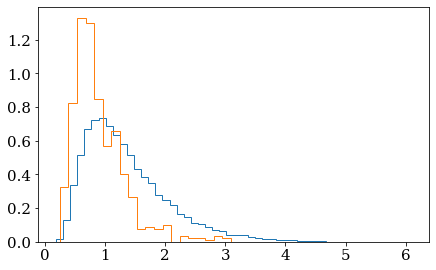

In [61]:
othercuts = "h1_cm_pt>0.25 and h2_cm_pt>0.25 and h2_p>0.35"
othercuts += " and (h1_p+h2_p)<nu and h1_z>0.5 and h2_z>0.05 and h2_z<0.45"
#othercuts += " and drap<1 and dphi< 1"

pass_ = dfs_pair['MC_D'].query("h1_pid==211 and h1_truth_pid ==211" + " and "+ othercuts)
fail =dfs_pair['MC_D'].query("h1_pid==211 and h1_truth_pid ==2212" + " and "+ othercuts)

print(len(pass_), len(fail))

#pass_ = pass_[:500]
#plt.scatter(pass_.h1_p, pass_.h1_th,3)
#plt.scatter(fail.h1_p, fail.h1_th,3)
#print(pass_.eval("e_th"))
testvars = []
#testvars.append("h1_cm_pt/sqrt(Q2)")
#testvars.append("(sqrt(h1_p**2+.938**2)+h2_p)/nu")
#testvars.append("sqrt(h1_p**2-h1_cm_pt**2)/sqrt(Q2+nu**2)")

#testvars.append("(h1_e*nu-sqrt(h1_p**2-h1_cm_pt**2)*sqrt(Q2+nu**2))/Q2")
testvars.append("h1_cm_pt/h2_cm_pt")
for var in testvars:
    
    plt.hist(pass_.eval(var), bins=50, density=True, histtype='step')
    plt.hist(fail.eval(var), bins=20, density=True, histtype='step')
    plt.show()

0.020495051329782334
0.011537681773780341
0.0071142894004460255
{321, 2212, -211, -9999, -11}
drap>0.5 and drap<1.5 [ 53  29   7   7  15  22  75 361] [ 51  28   6   0   5   8  21 193] [  1   1   1   6  10  13  54 167]
h1_cm_pt>0.4 and h1_cm_pt<0.6 [ 25  14   1   7   7  16  37 220] [ 24  13   1   1   4   6  14 172] [ 1  1  0  6  3 10 23 48]
h1_cm_pt>0.6 and h1_cm_pt<1.0 [ 10   1   2   1   4  20  43 206] [10  1  1  0  2  8  9 71] [  0   0   1   1   2  12  33 134]


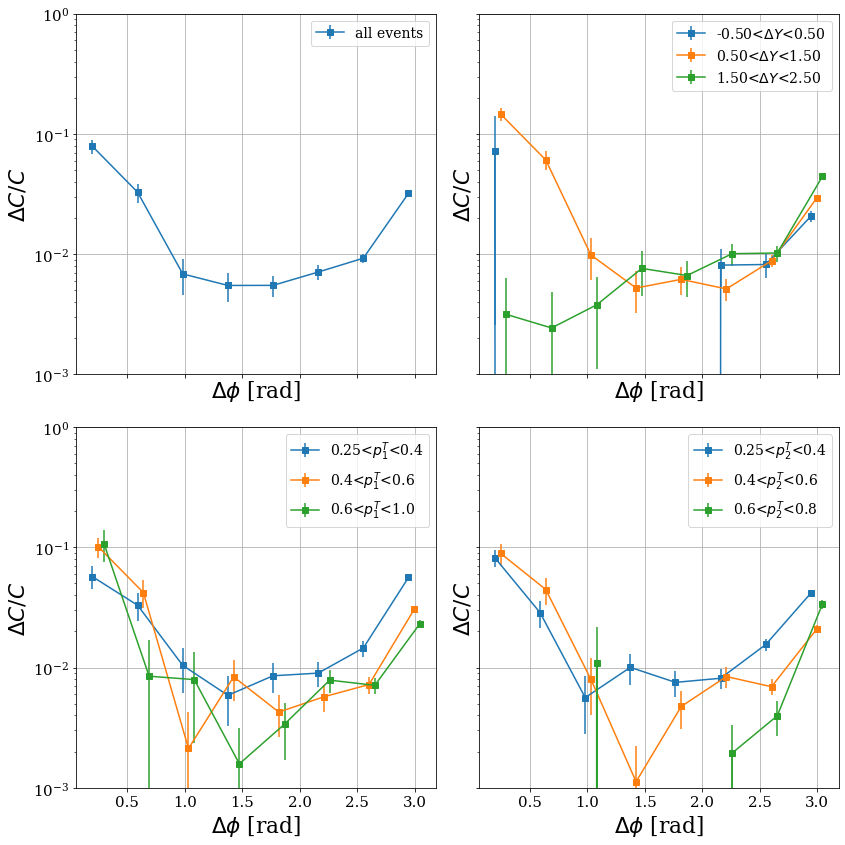

In [62]:
syst_from_misid={}
syst_from_misid_ratios={}

misid_p_rate={}
misid_K_rate={}

keys = "all dY pT1 pT2".split()
for A in "D".split():
    j = 0
    fig, axs=plt.subplots(2,2, figsize=(12, 12), sharex = True, sharey=True)
    df = dfs_pair[f'MC_{A}']

    othercuts = "h1_cm_pt>0.25 and h2_cm_pt>0.25 and h2_p>0.35"
    othercuts += " and (h1_p+h2_p)<nu and h1_z>0.5 and h2_z>0.05 and h2_z<0.45"
    othercuts += " and h1_cm_pt<2"
    othercuts += " and h2_cm_pt<2"
    ppimass="sqrt((sqrt(h1_p**2+.938272**2)+sqrt(h2_p**2+.139570**2))**2"\
       + "-h1_p**2-h2_p**2-2*h1_p*h2_p*(cos(pi/180*(h1_th))*cos(pi/180*(h2_th))+sin(pi/180*(h1_th))*sin(pi/180*(h2_th))*cos(pi/180*(h1_ph-h2_ph))))"
    #othercuts += f" and {ppimass}>1.2"
    #othercuts += " and h1_cm_pt>h2_p"

    num = df.query(othercuts+" and (h1_truth_pid != 211 or h2_truth_pid != -211) and h1_truth_pid !=-9999 and h1_pid==211 and h2_pid==-211")
    
    h1fail = df.query(othercuts+" and (h1_truth_pid != 211) and h1_pid==211 and h2_pid==-211")
    h2fail = df.query(othercuts+" and (h2_truth_pid != -211) and h1_pid==211 and h2_pid==-211")
    h1fail_p = df.query(othercuts+" and (h1_truth_pid == 2212 or h2_truth_pid == 2212) and h1_pid==211 and h2_pid==-211")
    h1fail_K = df.query(othercuts+" and (abs(h1_truth_pid) == 321 or abs(h2_truth_pid)==321) and h1_pid==211 and h2_pid==-211")
    
    #num = num.query("h1_truth_pid !=-9999")
    
    denom= df.query(othercuts+" and h1_pid==211 and h2_pid==-211 and h1_truth_pid != -9999")
    print(len(h1fail)/len(denom))
    print(len(h1fail_p)/len(denom))
    print(len(h1fail_K)/len(denom))
    print(set(h1fail.h1_truth_pid))

    slice_conds= ["drap==drap"]
    #for i in range(4):
    #    slice_conds.append(f"drap>{0.5*i} and drap<{0.5*(i+1)}")
    drap_slices=(-0.5,0.5, 1.5, 2.5)
    for i in range(3):
        slice_conds.append(f"drap>{drap_slices[i]} and drap<{drap_slices[i+1]}")
    
    slice_conds.append(f"h1_cm_pt>0.25 and h1_cm_pt<0.4")
    slice_conds.append(f"h1_cm_pt>0.4 and h1_cm_pt<0.6")
    slice_conds.append(f"h1_cm_pt>0.6 and h1_cm_pt<1.0")    

    slice_conds.append(f"h2_cm_pt>0.25 and h2_cm_pt<0.4")
    slice_conds.append(f"h2_cm_pt>0.4 and h2_cm_pt<0.6")
    slice_conds.append(f"h2_cm_pt>0.6 and h2_cm_pt<0.8")    

    #labels = "all events;0.0<$\Delta Y$<0.5;0.5<$\Delta Y$<1.0;1.0<$\Delta Y$<1.5;1.5<$\Delta Y$<2.0;"
    labels = "all events;"
    labels+= "".join([f"{drap_slices[i]:.2f}<$\Delta Y$<{drap_slices[i+1]:.2f};" for i in range(len(drap_slices)-1)])
    labels+= "0.25<$p^T_1$<0.4;0.4<$p^T_1$<0.6;0.6<$p^T_1$<1.0;"
    labels+= "0.25<$p^T_2$<0.4;0.4<$p^T_2$<0.6;0.6<$p^T_2$<0.8"
    labels= labels.split(";")

    shift=0
    for i, (slice_cond, label) in enumerate(zip(slice_conds, labels)):
        plt.sca(axs[j//2][j%2])
        n, x = np.histogram(num.query(slice_cond).eval("dphi"), bins=np.linspace(0, np.pi, 9))
        n_K,_ = np.histogram(h1fail_K.query(slice_cond).eval("dphi"), bins=np.linspace(0, np.pi, 9))
        n_p,_ = np.histogram(h1fail_p.query(slice_cond).eval("dphi"), bins=np.linspace(0, np.pi, 9))
        #print(n_K/n_p)
        h1f,x = np.histogram(h1fail.query(slice_cond).eval("dphi"), bins=np.linspace(0, np.pi, 9))
        h2f,x = np.histogram(h2fail.query(slice_cond).eval("dphi"), bins=np.linspace(0, np.pi, 9))
        
        
        d, x = np.histogram(denom.query(slice_cond).eval("dphi"), bins=np.linspace(0, np.pi, 9))
        
        
        if(max(n/d)>0.1):
            print(slice_cond, n, n_p, n_K)
        #n=n+0.5*(n==0)
        
        x= (x[1:]+x[:-1])/2+shift
        plt.errorbar(x, n/d, np.sqrt(n*(d-n)/d**3), label=label, marker='s')
        #plt.plot(x, h2f/d, linestyle='--')
        #print(h1f/n)
        if keys[j] not in syst_from_misid:
            syst_from_misid[keys[j]] = []
            syst_from_misid_ratios[keys[j]]=[]
            misid_p_rate[keys[j]] = []
            misid_K_rate[keys[j]]=[]
        syst_from_misid[keys[j]].append(n/d)
        nforR=n_K/2+n_p
        syst_from_misid_ratios[keys[j]].append(nforR/d)
        misid_p_rate[keys[j]].append(n_p/d)
        misid_K_rate[keys[j]].append(n_K/d)
        
        #if i in (0, 4, 7, 10):   
        if i in (0, 3, 6, 9):
            plt.xlabel("$\Delta\phi$ [rad]")
            plt.ylabel("$\Delta C/C$")
            plt.legend(fontsize=14)
            plt.yscale('log')
            plt.grid()
            plt.ylim(1e-3, 1)
            shift=0
            j+=1
        else:
            shift +=0.05
plt.tight_layout()
plt.show()

In [63]:
print(len(dfs_pair['MC_D'].query("h1_pid==211 and h2_pid==-211 and h1_p+h2_p>.9*nu"))/len(dfs_pair['MC_D'].query("h1_pid==211 and h2_pid==-211")))

0.16646461084047876


In [64]:

with open("misid_p_rate.pkl", "wb") as f:
    pickle.dump(misid_p_rate, f, pickle.HIGHEST_PROTOCOL)

with open("misid_K_rate.pkl", "wb") as f:
    pickle.dump(misid_K_rate, f, pickle.HIGHEST_PROTOCOL)

In [65]:
print(syst_from_misid)
with open("syst_from_misid.pkl", "wb") as f:
    pickle.dump(syst_from_misid, f, pickle.HIGHEST_PROTOCOL)

{'all': [array([0.07879656, 0.03271538, 0.00684932, 0.00549218, 0.00549954,
       0.00709677, 0.00925622, 0.03201629])], 'dY': [array([0.07142857, 0.        , 0.        , 0.        , 0.        ,
       0.00810537, 0.00820345, 0.0206859 ]), array([0.14600551, 0.06066946, 0.00983146, 0.00522778, 0.00617284,
       0.00513779, 0.00880799, 0.02924735]), array([0.00315457, 0.00243309, 0.00378788, 0.00761421, 0.00664207,
       0.01008827, 0.01022147, 0.04424614])], 'pT1': [array([0.05698006, 0.03296703, 0.01041667, 0.00587544, 0.00854093,
       0.00899101, 0.01454177, 0.05610473]), array([0.10121457, 0.04204204, 0.00212314, 0.00837321, 0.00426309,
       0.00571633, 0.00722233, 0.03050471]), array([0.10752688, 0.00847458, 0.00793651, 0.00158228, 0.00338409,
       0.00785546, 0.00711332, 0.02322959])], 'pT2': [array([0.08173077, 0.02862595, 0.00562588, 0.01003344, 0.00752941,
       0.00814725, 0.01554889, 0.04160541]), array([0.08898305, 0.04451039, 0.00796813, 0.0011236 , 0.00474777,
  

In [66]:
print(syst_from_misid_ratios)
with open("syst_from_misid_ratio.pkl", "wb") as f:
    pickle.dump(syst_from_misid_ratios, f, pickle.HIGHEST_PROTOCOL)

{'all': [array([0.07593123, 0.03162486, 0.00570776, 0.00295733, 0.00389551,
       0.00490323, 0.00649905, 0.0263024 ])], 'dY': [array([0.07142857, 0.        , 0.        , 0.        , 0.        ,
       0.00557244, 0.00471698, 0.01360915]), array([0.14187328, 0.05962343, 0.00912921, 0.00224048, 0.00411523,
       0.00338627, 0.00563711, 0.02240136]), array([0.00157729, 0.00121655, 0.00189394, 0.00507614, 0.00516605,
       0.00735603, 0.00876126, 0.04192229])], 'pT1': [array([0.05270655, 0.03186813, 0.00868056, 0.00293772, 0.00569395,
       0.00624376, 0.01301995, 0.05423457]), array([0.09919028, 0.04054054, 0.00212314, 0.00478469, 0.00334957,
       0.00392997, 0.00497755, 0.02717693]), array([0.10752688, 0.00847458, 0.00595238, 0.00079114, 0.00253807,
       0.00549882, 0.00421836, 0.01556157])], 'pT2': [array([0.078125  , 0.02767176, 0.00492264, 0.00543478, 0.00494118,
       0.00528063, 0.0088048 , 0.02587474]), array([0.08686441, 0.04302671, 0.0059761 , 0.0005618 , 0.00385757,
  

(array([0.0000e+00, 7.9248e+04, 7.5148e+04, 6.6367e+04, 1.6722e+04,
        5.0380e+03, 1.1780e+03, 2.4800e+02, 3.6000e+01, 4.0000e+00]),
 array([ 0.,  9., 18., 27., 36., 45., 54., 63., 72., 81., 90.]),
 <BarContainer object of 10 artists>)

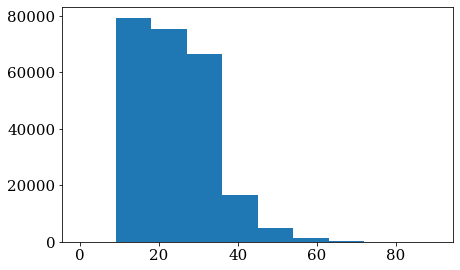

In [12]:
plt.hist(dfs_pair['MC_D'].h1_th,range=(-0,90))

['dphi', 'dphi_lab', 'drap', 'h1_z', 'h2_z', 'h1_cm_pt', 'h2_cm_pt', 'h1_xf', 'h2_xf', 'h1_rap', 'ycm', 'h2_rap', 'h1_pid', 'h2_pid', 'h1_cm_ph', 'h2_cm_ph', 'h1_cm_th', 'h2_cm_th', 'pair_mass', 'pair_pt', 'mx_eh1h2x', 'mx_eh1x', 'mx_eh2x', 't', 'Q2', 'nu', 'W', 'e_px', 'e_py', 'e_pz', 'e_p', 'e_ph', 'e_th', 'SampFracEl25', 'SampFracEl20', 'TargTypeSM', 'TargType', 'x', 'u', 'h1_ph', 'h1_th', 'h2_ph', 'h2_th', 'h1_deltaZ', 'h2_deltaZ', 'h1_Nphe', 'h2_Nphe', 'h1_Sector', 'h2_Sector', 'h1_FidCut', 'h2_FidCut', 'h1_FidCutPiPlus', 'h2_FidCutPiPlus', 'h1_Chi2CC', 'h2_Chi2CC', 'h1_StatCC', 'h2_StatCC', 'h1_Betta', 'h2_Betta', 'h1_T4', 'h2_T4', 'evnt', 'pass_recon', 'dphi_truth', 'dphi_lab_truth', 'drap_truth', 'h1_truth_z', 'h2_truth_z', 'h1_truth_cm_pt', 'h2_truth_cm_pt', 'h1_truth_xf', 'h2_truth_xf', 'h1_truth_rap', 'ycm_truth', 'h2_truth_rap', 'h1_truth_pid', 'h2_truth_pid', 'h1_truth_cm_ph', 'h2_truth_cm_ph', 'h1_truth_cm_th', 'h2_truth_cm_th', 'pair_mass_truth', 'pair_pt_truth', 'mx_eh1

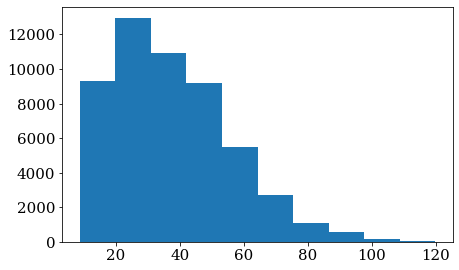

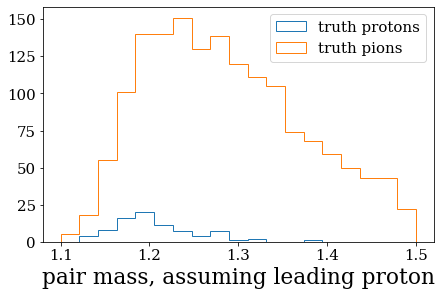

Text(0.5, 0, 'pair mass, assuming leading proton')

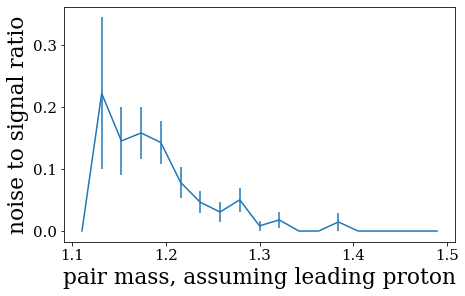

In [13]:
print(list(dfs_pair['MC_D'].columns))

plt.hist(dfs_pair['MC_D'].query("h2_pid==211").h2_th)
plt.show()

var="sqrt((sqrt(h1_p**2+.938272**2)+sqrt(h2_p**2+.139570**2))**2"\
       + "-h1_p**2-h2_p**2-2*h1_p*h2_p*(cos(pi/180*(h1_th))*cos(pi/180*(h2_th))+sin(pi/180*(h1_th))*sin(pi/180*(h2_th))*cos(pi/180*(h1_ph-h2_ph))))"
bins=np.linspace(1.1, 1.5, 20)

xlabel="pair mass, assuming leading proton"
y1,x,_= plt.hist(dfs_pair['MC_D'].query(\
        "h1_truth_pid == 2212 and h1_pid==211 and h1_cm_pt>.250 and h2_cm_pt>0.250 and h2_p>0.35 and dphi<pi/4 and h2_cm_pt<3"\
                               + " and drap<2.1 and (h1_p+h2_p)<nu and h2_pid==-211").eval(var), bins=bins,
         histtype='step',label="truth protons")#, density=True)
y2,x,_=plt.hist(dfs_pair['MC_D'].query(\
        "h1_truth_pid == 211 and h1_pid ==211 and h1_cm_pt>.250 and h2_cm_pt>0.250 and h1_p>0.35 and dphi<pi/4 and h2_cm_pt<3"\
                               + " and drap<2.1 and (h1_p+h2_p)<nu and h2_pid==-211").eval(var), bins=bins, histtype='step',
               label="truth pions")#, density=True)
plt.legend()
plt.xlabel(xlabel)

plt.show()

plt.errorbar((x[1:]+x[:-1])/2, y1/y2, y1/y2*np.sqrt(1/(y1+(y1==0))+1/(y2+(y2==0))))
plt.ylabel("noise to signal ratio")
plt.xlabel(xlabel)

['dphi', 'dphi_lab', 'drap', 'h1_z', 'h2_z', 'h1_cm_pt', 'h2_cm_pt', 'h1_xf', 'h2_xf', 'h1_rap', 'ycm', 'h2_rap', 'h1_pid', 'h2_pid', 'h1_cm_ph', 'h2_cm_ph', 'h1_cm_th', 'h2_cm_th', 'pair_mass', 'pair_pt', 'mx_eh1h2x', 'mx_eh1x', 'mx_eh2x', 't', 'Q2', 'nu', 'W', 'e_px', 'e_py', 'e_pz', 'e_p', 'e_ph', 'e_th', 'SampFracEl25', 'SampFracEl20', 'TargTypeSM', 'TargType', 'x', 'u', 'h1_ph', 'h1_th', 'h2_ph', 'h2_th', 'h1_deltaZ', 'h2_deltaZ', 'h1_Nphe', 'h2_Nphe', 'h1_Sector', 'h2_Sector', 'h1_FidCut', 'h2_FidCut', 'h1_FidCutPiPlus', 'h2_FidCutPiPlus', 'h1_Chi2CC', 'h2_Chi2CC', 'h1_StatCC', 'h2_StatCC', 'h1_Betta', 'h2_Betta', 'h1_T4', 'h2_T4', 'evnt', 'pass_recon', 'dphi_truth', 'dphi_lab_truth', 'drap_truth', 'h1_truth_z', 'h2_truth_z', 'h1_truth_cm_pt', 'h2_truth_cm_pt', 'h1_truth_xf', 'h2_truth_xf', 'h1_truth_rap', 'ycm_truth', 'h2_truth_rap', 'h1_truth_pid', 'h2_truth_pid', 'h1_truth_cm_ph', 'h2_truth_cm_ph', 'h1_truth_cm_th', 'h2_truth_cm_th', 'pair_mass_truth', 'pair_pt_truth', 'mx_eh1

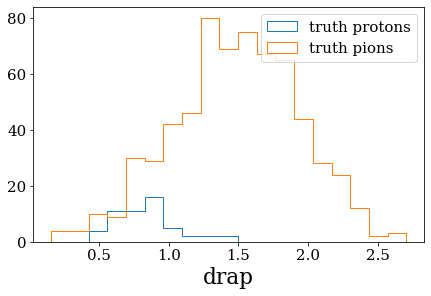

Text(0.5, 0, 'drap')

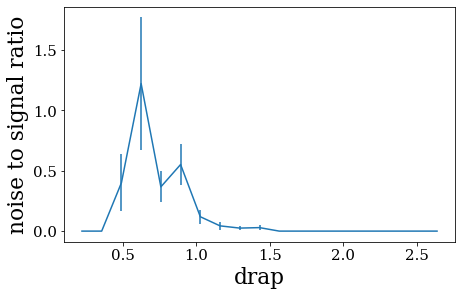

In [14]:
print(list(dfs_pair['MC_D'].columns))

#plt.hist(dfs_pair['MC_D'].query("h2_pid==211").h2_th)
#plt.show()

#var="h1_cm_pt/h2_cm_pt"
var="drap"

bincut=" and dphi<pi/8"
bincut=" and dphi<pi/8"
#bincut=" "

df= dfs_pair["MC_D"].query("h1_pid==211 and h1_cm_pt>.250 and h2_cm_pt>0.250 and h2_p>0.35 and h2_cm_pt<3"\
                               + f"{bincut} and (h1_p+h2_p)<nu and h1_FidCutPiPlus>0")
bins=np.linspace(np.min(df.eval(var)), np.max(df.eval(var)), 20)

xlabel=var
y1,x,_= plt.hist(dfs_pair['MC_D'].query(\
        "h1_truth_pid == 2212 and h1_pid==211 and h1_cm_pt>.250 and h2_cm_pt>0.250 and h2_p>0.35 and h2_cm_pt<3"\
                               + f"{bincut} and (h1_p+h2_p)<nu and h1_FidCutPiPlus>0").eval(var), bins=bins,
         histtype='step',label="truth protons", density=False)
y2,x,_=plt.hist(dfs_pair['MC_D'].query(\
        "h1_truth_pid == 211 and h1_pid ==211 and h1_cm_pt>.250 and h2_cm_pt>0.250 and h2_p>0.35 and h2_cm_pt<3"\
                               + f"{bincut} and (h1_p+h2_p)<nu and h1_FidCutPiPlus>0").eval(var), bins=bins, histtype='step',
               label="truth pions", density=False)
plt.legend()
#plt.yscale("log")
plt.xlabel(xlabel)

plt.show()
#plt.yscale('log')
plt.errorbar((x[1:]+x[:-1])/2, y1/y2, y1/(y2+(y2==0))*np.sqrt(1/(y1+(y1==0))+1/(y2+(y2==0))))
plt.ylabel("noise to signal ratio")
plt.xlabel(xlabel)

# resolution study

Starting election on dipion variables
This is Data
1.0< Q2 <4.0 243989  (100.00  %)
2.2 < nu < 4.2 243989  (100.00  %)
secondary hadrons are pions 143170  (58.68  %)
(h1_pid*h2_pid)<0, opposite charge pions 143096  (99.95  %)
kinematic limits for h2_z 142663  (99.70  %)
kinematic limits for dphi 142472  (99.87  %)
kinematic limits for pair_mass 135438  (95.06  %)
leading hadrons are pions 135438  (100.00  %)
0.2<h2_p<5.0 135198  (99.82  %)
0.2<h1_p<5.0 135198  (100.00  %)
10<h2_th 135172  (99.98  %)
Theta/P fiducial region selected for secondary hadron 127633  (94.42  %)
10< h1_th 127633  (100.00  %)
Theta/P fiducial region selected for trigger hadron 127633  (100.00  %)
Nom cuts for the pair applied (pi pi) 115368  (90.39  %)


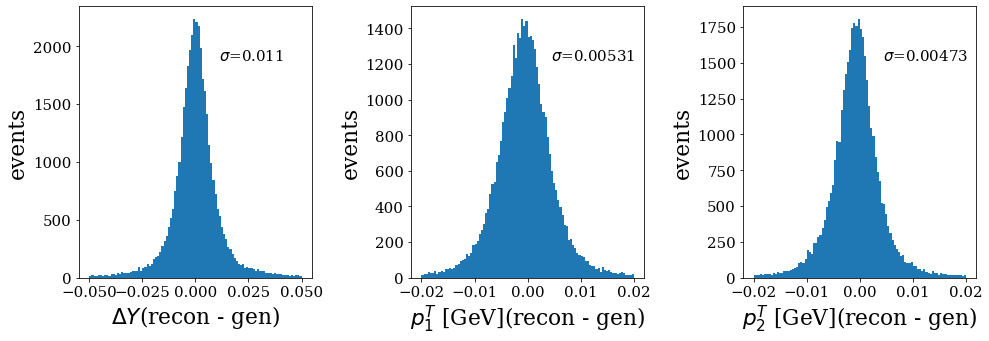

In [16]:
df = R2h_module.applyCutsPair(dfs_pair[f'MC_{A}'], nomCuts=True)

othercuts = "h1_cm_pt>0.25 and h2_cm_pt>0.25 and h2_p>0.35 and (h1_p+h2_p)<nu and h1_z>0.5  and h2_z>0.05 and h2_z<0.45"


df = df.query(othercuts+" and h1_pid==211 and h2_pid==-211")

fig,axs = plt.subplots(1,3, figsize=(14, 5))
for i,(expr,xlabel,window) in enumerate(zip(\
            ("drap-drap_truth", "h1_cm_pt-h1_truth_cm_pt", "h2_cm_pt-h2_truth_cm_pt"),
                          ("$\Delta Y$", "$p^T_1$ [GeV]", "$p^T_2$ [GeV]"),
                                       (.05, .02, .02)        
                         )):
    d=df.eval(expr)
    plt.sca(axs[i])
    plt.hist(d, bins=100, range=(-window, window))
    plt.xlabel(xlabel+ "(recon - gen)")
    plt.ylabel("events")
    sigma = np.std(d[(d>-window) & (d<window)])
    plt.text(0.6, 0.8, f"$\sigma$={sigma:.3}", transform=plt.gca().transAxes)
plt.tight_layout()
plt.show()


Starting election on dipion variables
This is Data
1.0< Q2 <4.0 243989  (100.00  %)
2.2 < nu < 4.2 243989  (100.00  %)
secondary hadrons are pions 143170  (58.68  %)
(h1_pid*h2_pid)<0, opposite charge pions 143096  (99.95  %)
kinematic limits for h2_z 142663  (99.70  %)
kinematic limits for dphi 142472  (99.87  %)
kinematic limits for pair_mass 135438  (95.06  %)
leading hadrons are pions 135438  (100.00  %)
0.2<h2_p<5.0 135198  (99.82  %)
0.2<h1_p<5.0 135198  (100.00  %)
10<h2_th 135172  (99.98  %)
Theta/P fiducial region selected for secondary hadron 127633  (94.42  %)
10< h1_th 127633  (100.00  %)
Theta/P fiducial region selected for trigger hadron 127633  (100.00  %)
Nom cuts for the pair applied (pi pi) 115368  (90.39  %)
Starting election on dipion variables
This is Data
1.0< Q2 <4.0 233985  (100.00  %)
2.2 < nu < 4.2 233985  (100.00  %)
secondary hadrons are pions 138163  (59.05  %)
(h1_pid*h2_pid)<0, opposite charge pions 138107  (99.96  %)
kinematic limits for h2_z 137710  (99

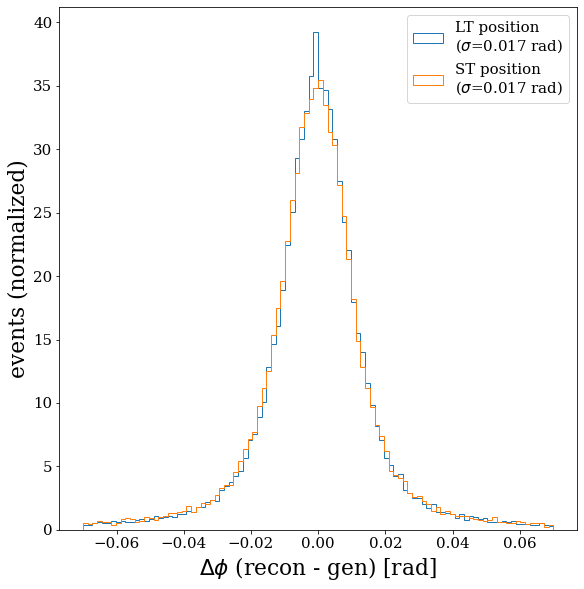

In [46]:

fig,axs = plt.subplots(1,1, figsize=(8, 8))
for i,(A, label) in enumerate(zip("DC",("LT position", "ST position"))):
    df = R2h_module.applyCutsPair(dfs_pair[f'MC_{A}'], nomCuts=True)

    othercuts = "h1_cm_pt>0.25 and h2_cm_pt>0.25 and h2_p>0.35 and (h1_p+h2_p)<nu and h1_z>0.5  and h2_z>0.05 and h2_z<0.45"


    df = df.query(othercuts+" and h1_pid==211 and h2_pid==-211")

    expr= "dphi-dphi_truth"
    d=df.eval(expr)
    window=0.07
    d=d[abs(d)<window]
    sigma=np.std(d)
    import math
    plt.hist(d, bins=100, range=(-window, window), histtype='step', density=True,
            label=label + f"\n($\\sigma$={sigma:.3f} rad)")
    
plt.tight_layout()
plt.legend()
plt.xlabel("$\Delta\phi$ (recon - gen) [rad]")
plt.ylabel("events (normalized)")
plt.show()

# Efficiency study

In [31]:
for df in dfs_pair[f'MC_{A}']:
    df['h2_truth_p']= np.sqrt()

['dphi', 'dphi_lab', 'drap', 'h1_z', 'h2_z', 'h1_cm_pt', 'h2_cm_pt', 'h1_xf', 'h2_xf', 'h1_rap', 'ycm', 'h2_rap', 'h1_pid', 'h2_pid', 'h1_cm_ph', 'h2_cm_ph', 'h1_cm_th', 'h2_cm_th', 'pair_mass', 'pair_pt', 'mx_eh1h2x', 'mx_eh1x', 'mx_eh2x', 't', 'Q2', 'nu', 'W', 'e_px', 'e_py', 'e_pz', 'e_p', 'e_ph', 'e_th', 'SampFracEl25', 'SampFracEl20', 'TargTypeSM', 'TargType', 'x', 'u', 'h1_ph', 'h1_th', 'h2_ph', 'h2_th', 'h1_deltaZ', 'h2_deltaZ', 'h1_Nphe', 'h2_Nphe', 'h1_Sector', 'h2_Sector', 'h1_FidCut', 'h2_FidCut', 'h1_FidCutPiPlus', 'h2_FidCutPiPlus', 'h1_Chi2CC', 'h2_Chi2CC', 'h1_StatCC', 'h2_StatCC', 'h1_Betta', 'h2_Betta', 'h1_T4', 'h2_T4', 'evnt', 'pass_recon', 'dphi_truth', 'dphi_lab_truth', 'drap_truth', 'h1_truth_z', 'h2_truth_z', 'h1_truth_cm_pt', 'h2_truth_cm_pt', 'h1_truth_xf', 'h2_truth_xf', 'h1_truth_rap', 'ycm_truth', 'h2_truth_rap', 'h1_truth_pid', 'h2_truth_pid', 'h1_truth_cm_ph', 'h2_truth_cm_ph', 'h1_truth_cm_th', 'h2_truth_cm_th', 'pair_mass_truth', 'pair_pt_truth', 'mx_eh1

(array([  806.,   892.,  1226.,  1748.,  2599.,  4144.,  6661., 10565.,
        16536., 20981.]),
 array([4.47440465e-04, 3.14561865e-01, 6.28676290e-01, 9.42790715e-01,
        1.25690514e+00, 1.57101956e+00, 1.88513399e+00, 2.19924841e+00,
        2.51336284e+00, 2.82747726e+00, 3.14159169e+00]),
 <BarContainer object of 10 artists>)

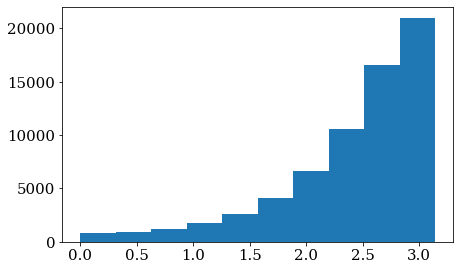

Entries before cut  83176
Q2>1.0 and Q2<4.0 83176  (100.00  %)
0.2<h1_p<5.0  83176  (100.00  %)
inelasticity < 0.85 83176  (100.00  %)
h1_pid = pions (trigger) 83176  (100.00  %)
2.2 < nu <4.2 83176  (100.00  %)
10< h1_th 83176  (100.00  %)
Theta/P fiducial region selected for trigger hadron 83176  (100.00  %)
Nom cuts for the trigger applied 69252  (83.26  %)
rms= 0.029992936366674616 chi2= 53.171265879613145
Entries before cut  83176
Q2>1.0 and Q2<4.0 83176  (100.00  %)
0.2<h1_p<5.0  83176  (100.00  %)
inelasticity < 0.85 83176  (100.00  %)
h1_pid = pions (trigger) 83176  (100.00  %)
2.2 < nu <4.2 83176  (100.00  %)
10< h1_th 83176  (100.00  %)
Theta/P fiducial region selected for trigger hadron 83176  (100.00  %)
Nom cuts for the trigger applied 69252  (83.26  %)
rms= 0.03271827252091659 chi2= 57.934076193329126


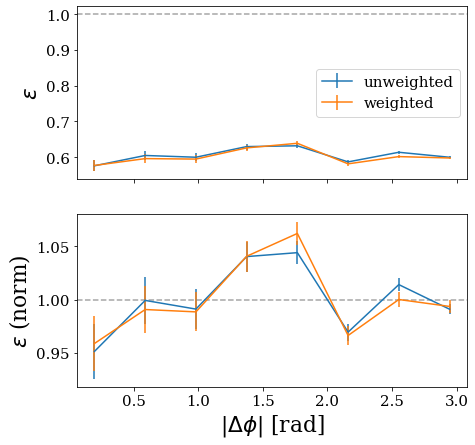

In [114]:
fig, axs = plt.subplots(2,1, figsize=(7,7), sharex='all')
for weighted in False, True:
    

    for A in "D".split():
        df = dfs_mc[f'{A}']
        cuts = "h1_cm_pt>0.25 and h2_truth_cm_pt>0.25 and sqrt((nu_truth*h2_truth_z)**2-.1396**2)>0.35"
        cuts += " and h1_z>0.5 and h2_truth_z>0.05 and h2_truth_z<0.45"
        cuts += " and h1_pid==211 and h2_truth_pid==-211 and h1_th>10 and h1_truth_pid==211"
        cuts += " and ((h2_truth_th>25 and sqrt((nu_truth*h2_truth_z)**2-.1396**2)>0.7) or (sqrt((nu_truth*h2_truth_z)**2-.1396**2)>0.5 & h2_truth_th>30) or (h2_truth_th>40))"
        #cuts='h1_cm_pt>0'
        df= R2h_module.applyCuts(df.query(cuts), nomCuts=True)
        #othercuts = "h1_cm_pt>0.25 and h2_cm_pt>0.25 and h2_p>0.35 and (h1_p+h2_p)<nu and h1_z>0.5  and h2_z>0.05 and h2_z<0.45"
        #df = df.query(othercuts)
        denom,x = np.histogram(df.eval("abs(dphi_truth)"), bins=np.linspace(0, np.pi, 9), weights=df.weight_truth if weighted else None)
        dfpass = df.query("h2_pid==-211 and h2_z>0 and abs(h2_deltaZ)<3 and h2_FidCutPiPlus==1 and (h1_p+h2_p)/nu<1.")
        num,x = np.histogram(dfpass.eval("abs(dphi_truth)"), bins=np.linspace(0, np.pi, 9), weights=dfpass.weight_truth if weighted else None)
        eff=num/denom
        deff=np.sqrt((num)*(denom-num)/(denom**3))
        x=(x[:-1]+x[1:])/2
        y=eff/np.mean(eff)
        dy = deff/np.mean(eff)
        rms = np.sqrt(sum((y-1)**2)/len(y))
        print("rms=",rms, "chi2=", sum((y-1)**2/(dy**2)))
        axs[0].errorbar(x,eff, deff,label=("weighted" if weighted else "unweighted"))
        axs[1].errorbar(x,y, dy)
axs[0].axhline(1, color='0.5', alpha=0.7, linestyle='--')
axs[1].axhline(1, color='0.5', alpha=0.7, linestyle='--')
axs[1].set_xlabel("$|\\Delta\\phi|$ [rad]")
axs[0].legend()
axs[0].set_ylabel("$\\epsilon$")
axs[1].set_ylabel("$\\epsilon$ (norm)")
plt.show()

Entries before cut  72175
Q2>1.0 and Q2<4.0 72175  (100.00  %)
0.2<h1_p<5.0  72175  (100.00  %)
inelasticity < 0.85 72175  (100.00  %)
h1_pid = pions (trigger) 72175  (100.00  %)
2.2 < nu <4.2 72175  (100.00  %)
10< h1_th 72175  (100.00  %)
Theta/P fiducial region selected for trigger hadron 72175  (100.00  %)
Nom cuts for the trigger applied 72175  (100.00  %)


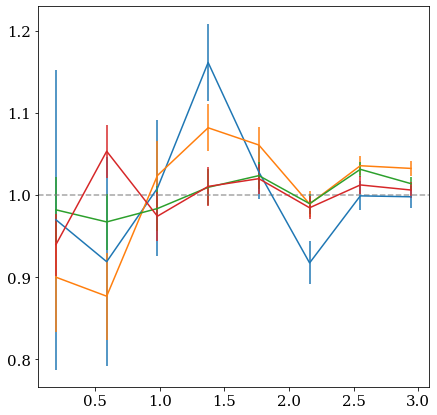

In [47]:
fig, ax = plt.subplots(1,1, figsize=(7,7))
for A in "D".split():
    df = dfs_mc[f'MC_{A}']
    cuts = "h1_cm_pt>0.25 and h2_truth_cm_pt>0.25 and sqrt((nu*h2_truth_z)**2-.1396**2)>0.35"
    cuts += " and h1_z>0.5 and h2_truth_z>0.05 and h2_truth_z<0.45"
    cuts += " and h1_pid==211 and h2_truth_pid==-211 and h1_th>10 and h1_truth_pid==211"
    cuts += " and ((h2_truth_th*180/pi>25 and sqrt((nu*h2_truth_z)**2-.1396**2)>0.7) or (sqrt((nu*h2_truth_z)**2-.1396**2)>0.5 & h2_truth_th*180/pi>30) or (h2_truth_th*180/pi>40))"
    
    df= R2h_module.applyCuts(df.query(cuts), nomCuts=True)
    
    for i in range(4):
        dfq = df.query(f"drap_truth>{i*.5} and drap_truth<{(i+1)*.5}")
        denom,x = np.histogram(dfq.eval("dphi_truth"), bins=np.linspace(0, np.pi, 9))
        num,x = np.histogram(dfq.query("h2_z>0").eval("dphi_truth"), bins=np.linspace(0, np.pi, 9))
        eff=num/denom
        deff=np.sqrt((num)*(denom-num)/(denom**3))
        x=(x[:-1]+x[1:])/2
        y=eff/np.mean(eff)
        dy = deff/np.mean(eff)
        plt.errorbar(x,y, dy)
plt.axhline(1, color='0.5', alpha=0.7, linestyle='--')